<a href="https://colab.research.google.com/github/paritosh-Shukla24/Neo_4j-RAG-with-Knowledge_Graph-/blob/main/RAG_with_Knowledge_Graph(Neo_4j).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install langchain langchain-core langchain-community langchain-openai langchain-experimental

  Using cached langchain-0.2.6-py3-none-any.whl (975 kB)
  Using cached langchain_core-0.2.11-py3-none-any.whl (337 kB)
  Using cached langchain_community-0.2.6-py3-none-any.whl (2.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 819.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00


 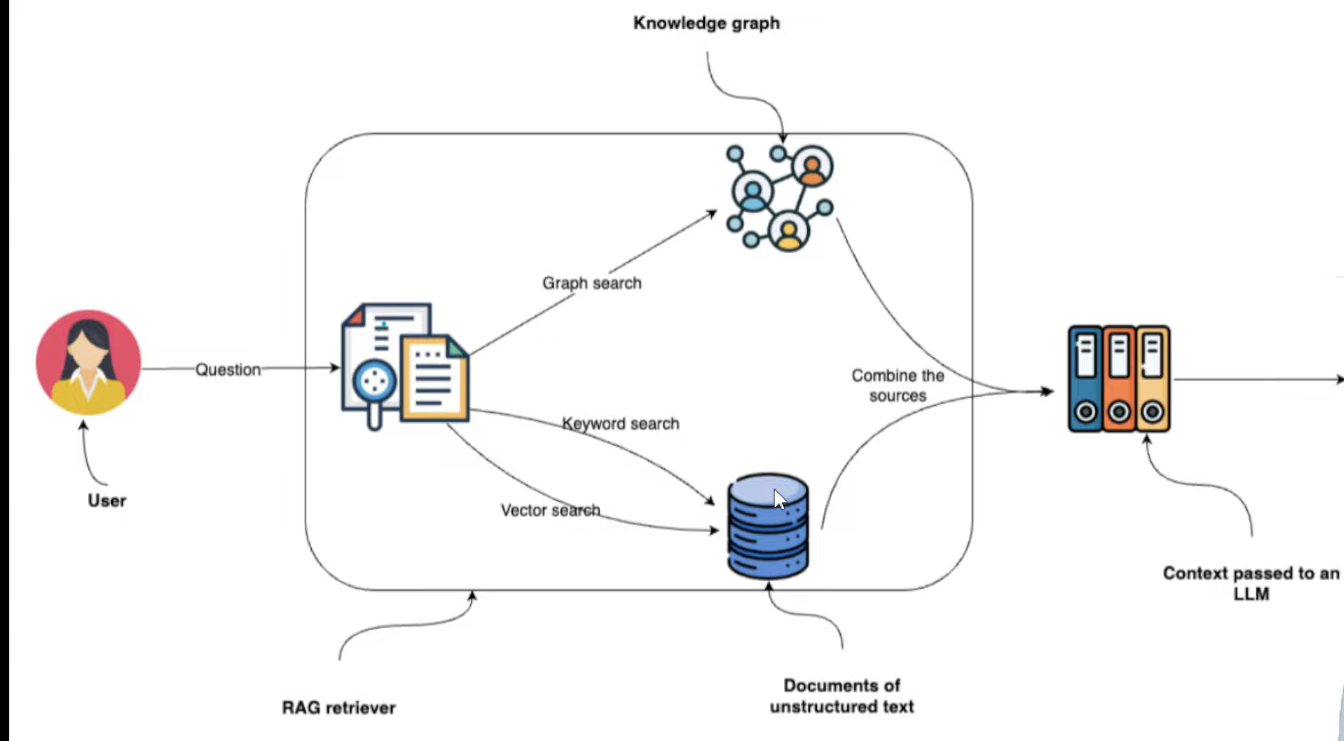



In [4]:
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')


In [6]:
from langchain_community.graphs import Neo4jGraph

In [16]:
import os


In [22]:
pip install tiktoken yfiles_jupyter_graphs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [8]:
pip install neo4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.5/293.5 kB 5.8 MB/s eta 0:00:00


In [14]:
NEO4J_URI="neo4j+s://2ac84557.databases.neo4j.io"
NEO4J_USERNAME="neo4j"
NEO4J_PASSWORD="zeozKJP7J2HDm54yC1LC-NLxmWa6VkaYg0YdB8CH_mM"
AURA_INSTANCEID="2ac84557"
AURA_INSTANCENAME="Instance01"

In [17]:
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
os.environ["NEO4J_URI"] = NEO4J_URI
os.environ["NEO4J_USERNAME"] = NEO4J_USERNAME
os.environ["NEO4J_PASSWORD"] = NEO4J_PASSWORD

In [18]:
graph=Neo4jGraph()

In [11]:
%pip install --upgrade --quiet  wikipedia

  Preparing metadata (setup.py) ... done


In [20]:
from langchain.document_loaders import WikipediaLoader
raw_documents=WikipediaLoader(query="Maharana Pratap").load()

In [21]:
raw_documents

[Document(metadata={'title': 'Maharana Pratap', 'summary': 'Pratap Singh I (c. 9 May 1540 – 19 January 1597), popularly known as Maharana Pratap (IPA: [məɦaːˈɾaːɳaː pɾəˈtaːp] ), was a king of Kingdom of Mewar, in north-western India in the present-day state of Rajasthan. He is notable for leading the Rajput resistance against the expansionist policy of the Mughal Emperor Akbar including the Battle of Haldighati.', 'source': 'https://en.wikipedia.org/wiki/Maharana_Pratap'}, page_content="Pratap Singh I (c. 9 May 1540 – 19 January 1597), popularly known as Maharana Pratap (IPA: [məɦaːˈɾaːɳaː pɾəˈtaːp] ), was a king of Kingdom of Mewar, in north-western India in the present-day state of Rajasthan. He is notable for leading the Rajput resistance against the expansionist policy of the Mughal Emperor Akbar including the Battle of Haldighati.\n\n\n== Early life and accession ==\nMaharana Pratap was born to Udai Singh II of Mewar and Jaiwanta Bai in 1540, the year in which Udai Singh ascended 

In [23]:
from langchain.text_splitter import TokenTextSplitter
text_splitter=TokenTextSplitter(chunk_size=512,chunk_overlap=20)
documents=text_splitter.split_documents(raw_documents[:3])

In [24]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(temperature=0,model_name="gpt-3.5-turbo-0125")

In [25]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
llm_transformer=LLMGraphTransformer(llm=llm)

In [26]:
graph_documents=llm_transformer.convert_to_graph_documents(documents)

In [27]:
graph_documents

[GraphDocument(nodes=[Node(id='Pratap Singh', type='Person'), Node(id='Maharana Pratap', type='Person'), Node(id='Udai Singh Ii', type='Person'), Node(id='Jaiwanta Bai', type='Person'), Node(id='Shakti Singh', type='Person'), Node(id='Vikram Singh', type='Person'), Node(id='Jagmal Singh', type='Person'), Node(id='Chand Kanwar', type='Person'), Node(id='Man Kanwar', type='Person'), Node(id='Ajabde Bai Punwar', type='Person'), Node(id='Amar Singh I', type='Person'), Node(id='Rani Dheer Bai Bhatiyani', type='Person'), Node(id='Akbar', type='Person'), Node(id='Vanvir Singh', type='Person'), Node(id='Jagmal', type='Person'), Node(id='Rani Dheer Bai Bhatiyani', type='Person')], relationships=[Relationship(source=Node(id='Pratap Singh', type='Person'), target=Node(id='Maharana Pratap', type='Person'), type='ALIAS'), Relationship(source=Node(id='Udai Singh Ii', type='Person'), target=Node(id='Pratap Singh', type='Person'), type='PARENT'), Relationship(source=Node(id='Jaiwanta Bai', type='Perso

In [28]:
graph.add_graph_documents(
    graph_documents,
    baseEntityLabel=True,
    include_source=True
)


In [29]:
default_cypher = "MATCH (s)-[r:!MENTIONS]->(t) RETURN s,r,t LIMIT 50"


In [30]:
from yfiles_jupyter_graphs import GraphWidget
from neo4j import GraphDatabase


In [31]:
try:
  import google.colab
  from google.colab import output
  output.enable_custom_widget_manager()
except:
  pass

In [32]:
def showGraph(cypher: str = default_cypher):
    # create a neo4j session to run queries
    driver = GraphDatabase.driver(
        uri = os.environ["NEO4J_URI"],
        auth = (os.environ["NEO4J_USERNAME"],
                os.environ["NEO4J_PASSWORD"]))
    session = driver.session()
    widget = GraphWidget(graph = session.run(cypher).graph())
    widget.node_label_mapping = 'id'
    display(widget)
    return widget


In [33]:
showGraph()

GraphWidget(layout=Layout(height='800px', width='100%'))

GraphWidget(layout=Layout(height='800px', width='100%'))

In [34]:
from typing import Tuple, List, Optional


In [37]:
from langchain_community.vectorstores import Neo4jVector


In [38]:
from langchain_openai import OpenAIEmbeddings
vector_index = Neo4jVector.from_existing_graph(
    OpenAIEmbeddings(),
    search_type="hybrid",
    node_label="Document",
    text_node_properties=["text"],
    embedding_node_property="embedding"
)

ValueError: Index with name vector already exists.The provided embedding function and vector index dimensions do not match.
Embedding function dimension: 1536
Vector index dimension: 384

In [39]:
from langchain_openai import OpenAIEmbeddings
vector_index = Neo4jVector.from_existing_graph(
    OpenAIEmbeddings(),
    search_type="hybrid",
    node_label="Document",
    text_node_properties=["text"],
    embedding_node_property="embedding",
    index_name="new_vector_index"  # Use a different index name
)

In [40]:
graph.query("CREATE FULLTEXT INDEX entity IF NOT EXISTS FOR (e:__Entity__) ON EACH [e.id]")



[]

In [41]:
from langchain_core.pydantic_v1 import BaseModel, Field
# Extract entities from text
class Entities(BaseModel):
    """Identifying information about entities."""

    names: List[str] = Field(
        ...,
        description="All the person, organization, or business entities that "
        "appear in the text",
    )


In [42]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts.prompt import PromptTemplate


In [43]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are extracting organization and person entities from the text.",
        ),
        (
            "human",
            "Use the given format to extract information from the following "
            "input: {question}",
        ),
    ]
)


In [44]:
entity_chain = prompt | llm.with_structured_output(Entities)


In [45]:
entity_chain.invoke({"question": "Where was Maharana Pratap born?"}).names

['Maharana Pratap']

In [46]:
from langchain_community.vectorstores.neo4j_vector import remove_lucene_chars

In [47]:
def generate_full_text_query(input: str) -> str:
    full_text_query = ""
    words = [el for el in remove_lucene_chars(input).split() if el]
    for word in words[:-1]:
        full_text_query += f" {word}~2 AND"
    full_text_query += f" {words[-1]}~2"
    return full_text_query.strip()



In [48]:
def structured_retriever(question: str) -> str:
    result = ""
    entities = entity_chain.invoke({"question": question})
    for entity in entities.names:
        response = graph.query(
            """CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})
            YIELD node,score
            CALL {
              WITH node
              MATCH (node)-[r:!MENTIONS]->(neighbor)
              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output
              UNION ALL
              WITH node
              MATCH (node)<-[r:!MENTIONS]-(neighbor)
              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output
            }
            RETURN output LIMIT 50
            """,
            {"query": generate_full_text_query(entity)},
        )
        result += "\n".join([el['output'] for el in response])
    return result


In [50]:
print(structured_retriever("Who is Maharana Pratap?"))

Maharana Pratap - CONFLICT -> Mughal Emperor Akbar
Maharana Pratap - DIPLOMATIC_RELATION -> Raja Man Singh I
Maharana Pratap - BATTLE -> Haldighati
Maharana Pratap - NAMED_AFTER -> Maharana Pratap Airport
Maharana Pratap - BELONGS_TO -> Mewar
Maharana Pratap - ACTOR -> Sharad Malhotra
Maharana Pratap - ACTOR -> Rachana Parulkar
Maharana Pratap - ACTOR -> Faisal Khan
Maharana Pratap - ACTOR -> Roshni Walia
Maharana Pratap - HAD -> Military Career
Pratap Singh - ALIAS -> Maharana Pratap
Pratap Singh - SUCCESSOR -> Maharana Pratap
Amitabh Bachchan - NARRATOR -> Maharana Pratap
Pratap Singh I - KNOWN_AS -> Maharana Pratap
921e76b2a3a4f23f8cd3742312691883ad93143f - HAS_ENTITY -> Maharana Pratap
f2ab23063ab6f040ca79d1c241250f66449ad52e - HAS_ENTITY -> Maharana Pratap
08e54a230a510802455b4b05a35f3b9b1aa88ca5 - HAS_ENTITY -> Maharana Pratap
9c8ae552b200b2bd751d7c52e1f0c0d687bc4b0c - HAS_ENTITY -> Maharana Pratap
Maharana Pratap Airport - SERVES -> Udaipur
Maharana Pratap Airport - LOCATED_IN -

In [51]:
def retriever(question: str):
    print(f"Search query: {question}")
    structured_data = structured_retriever(question)
    unstructured_data = [el.page_content for el in vector_index.similarity_search(question)]
    final_data = f"""Structured data:
{structured_data}
Unstructured data:
{"#Document ". join(unstructured_data)}
    """
    return final_data



In [52]:
_template = """Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question,
in its original language.
Chat History:
{chat_history}
Follow Up Input: {question}
Standalone question:"""

In [53]:
CONDENSE_QUESTION_PROMPT = PromptTemplate.from_template(_template)


In [54]:
def _format_chat_history(chat_history: List[Tuple[str, str]]) -> List:
    buffer = []
    for human, ai in chat_history:
        buffer.append(HumanMessage(content=human))
        buffer.append(AIMessage(content=ai))
    return buffer

In [59]:
from langchain_core.runnables import (
    RunnableBranch,
    RunnableLambda,
    RunnableParallel,
    RunnablePassthrough,
)
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser


In [60]:
_search_query = RunnableBranch(
    # If input includes chat_history, we condense it with the follow-up question
    (
        RunnableLambda(lambda x: bool(x.get("chat_history"))).with_config(
            run_name="HasChatHistoryCheck"
        ),  # Condense follow-up question and chat into a standalone_question
        RunnablePassthrough.assign(
            chat_history=lambda x: _format_chat_history(x["chat_history"])
        )
        | CONDENSE_QUESTION_PROMPT
        | ChatOpenAI(temperature=0)
        | StrOutputParser(),
    ),
    # Else, we have no chat history, so just pass through the question
    RunnableLambda(lambda x : x["question"]),
)

In [63]:
template = """Answer the question based only on the following context:
{context}

Question: {question}
Use natural language and be concise.
Answer:"""
prompt = ChatPromptTemplate.from_template(template)

In [64]:
chain = (
    RunnableParallel(
        {
            "context": _search_query | retriever,
            "question": RunnablePassthrough(),
        }
    )
    | prompt
    | llm
    | StrOutputParser()
)


In [65]:

chain.invoke({"question": "From Which Kingdom Do Maharana Pratap Belong to the?"})

Search query: From Which Kingdom Do Maharana Pratap Belong to the?


'Maharana Pratap belongs to the Kingdom of Mewar.'

In [66]:
chain.invoke({"question": "Who was the his father?"})

Search query: Who was the his father?


'Udai Singh II.'